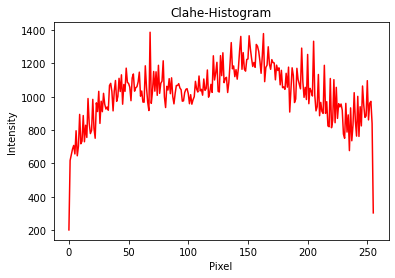

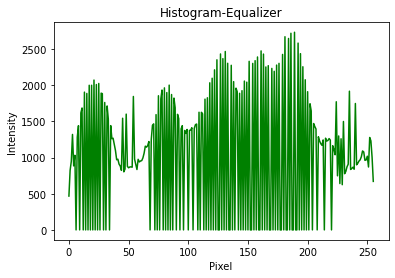

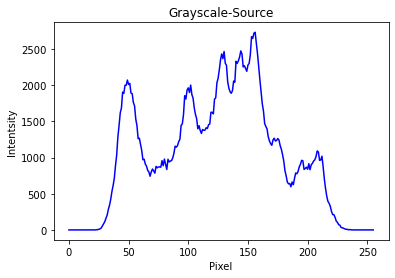

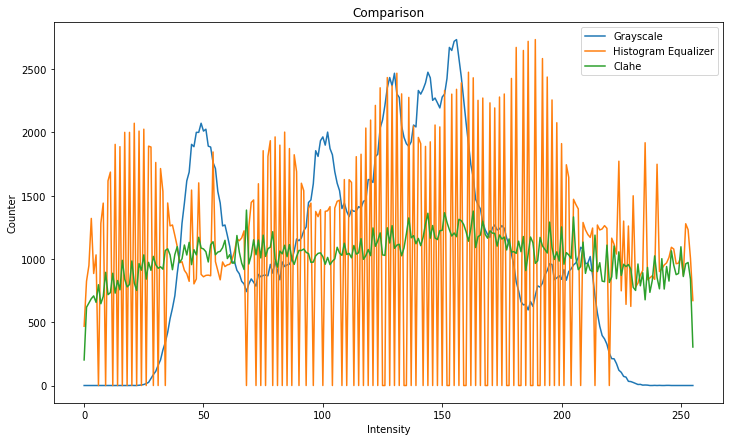

27

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('lena.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
height = gray.shape[0] 
width = gray.shape[1] 

gray_counter = np.zeros(256, dtype = int) #256 from 0 to 255 frequency

for i in range(height):
    for j in range(width):
        gray_counter[gray[i][j]] += 1
        
equ_image=cv2.equalizeHist(gray)
        
equ_counter = np.zeros(256, dtype = int) 
for i in range(height):
    for j in range(width):
        equ_counter[equ_image[i][j]] += 1
        
clahe = cv2.createCLAHE(clipLimit = 8, tileGridSize=(4,4)) #Default = clip size 40, tile grid size = 8x8   
clahe_image = clahe.apply(gray)

clahe_counter = np.zeros(256, dtype = int) 
for i in range(height):
    for j in range(width):
        clahe_counter[clahe_image[i][j]] += 1

#visualization
plt.plot(clahe_counter,'r',label="Histogram")
plt.title('Clahe-Histogram')
plt.ylabel('Intensity'),plt.xlabel('Pixel')
plt.show()
  
plt.plot(equ_counter,'g',label="Histogram")
plt.title('Histogram-Equalizer')
plt.ylabel('Intensity'),plt.xlabel('Pixel')
plt.show()

plt.plot(gray_counter,'b',label="Histogram")
plt.title('Grayscale-Source')
plt.xlabel("Pixel"),plt.ylabel("Intentsity")
plt.show()

plt.figure(figsize=(12,7))
plt.plot(gray_counter, label='Grayscale')
plt.plot(equ_counter, label = 'Histogram Equalizer')
plt.plot(clahe_counter, label ="Clahe")
plt.xlabel("Intensity"),plt.ylabel("Counter")
plt.title('Comparison')
plt.legend()
plt.show()

result = np.hstack((gray,equ_image,clahe_image))
cv2.imshow("equ",result)
cv2.waitKey(0)

In [2]:
gray.shape

(512, 512)

Histogram Equalization -> Adaptive Histogram Equalization -> CLAHE (contrast limit adaptive Histogram Equalization)